In [179]:
import numpy as np
%matplotlib inline
import os

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

from astropy.io import fits
from IPython.display import Image
import fsps
import sedpy
import prospect

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


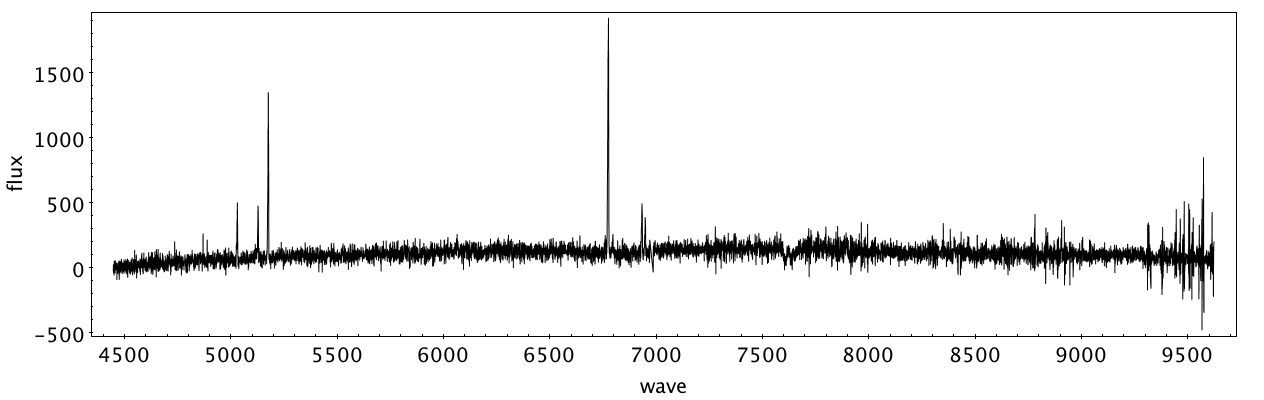

In [180]:
Image('../data/keck_data/bluedot/spectra.png')

In [181]:
hdul = fits.open('../data/keck_data/bluedot/bluedot_coadd.fits')

In [182]:
info = hdul.info()
hdr = hdul[0].header
print(hdr)
data = hdul[1].data

Filename: ../data/keck_data/bluedot/bluedot_coadd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (2223,)   uint8   
  1  /Users/yifei/Dropbox/Keck_Data/data4kate_reduced/bluedot/keck_dei...    1 BinTableHDU     20   8109R x 4C   [D, D, D, K]   
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                 2223 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                 

In [183]:
hdul[1].data

FITS_rec([(4446.12902272, -21.32351621, 0.00629225, 1),
          (4446.94210013, -21.80260152, 0.00330288, 1),
          (4447.48462873, -18.98046036, 0.00334562, 1), ...,
          (9621.98657724, 146.05513001, 0.00067209, 1),
          (9622.6248291 , 181.53715258, 0.00061786, 1),
          (9623.26263454, 198.40326476, 0.00057416, 1)],
         dtype=(numpy.record, [('wave', '>f8'), ('flux', '>f8'), ('ivar', '>f8'), ('mask', '>i8')]))

In [184]:
hdul[0].data.shape

(2223,)

In [185]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                 8109 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                    4 / number of columns                              
EXTNAME = '/Users/yifei/Dropbox/Keck_Data/data4kate_reduced/bluedot/keck_dei...'
TTYPE1  = 'wave    '           / label for column 1                             
TFORM1  = 'D       '           / format for column 1                            
TTYPE2  = 'flux    '           / label for column 2                             
TFORM2  = 'D       '        

In [186]:
w = data['wave']
f = data['flux']

In [187]:
print(len(w))

8109


Text(0, 0.5, 'flux')

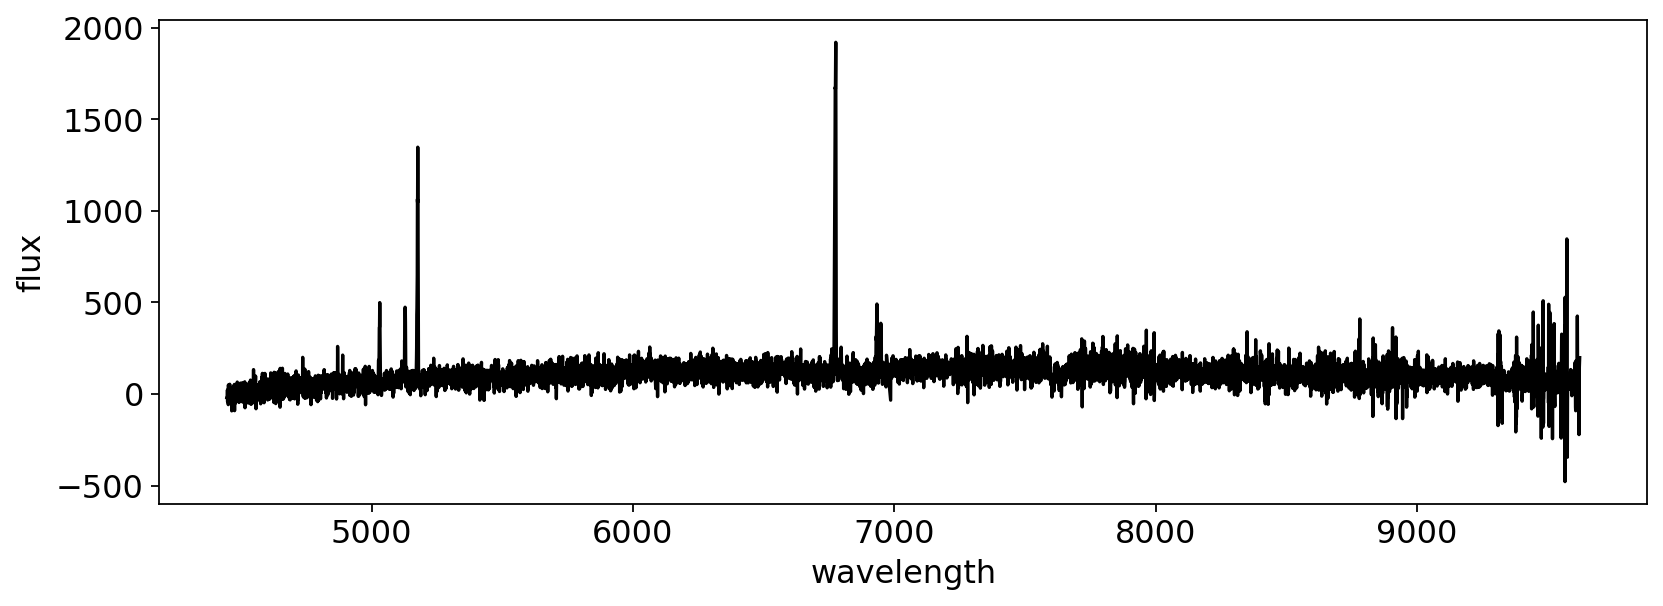

In [188]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

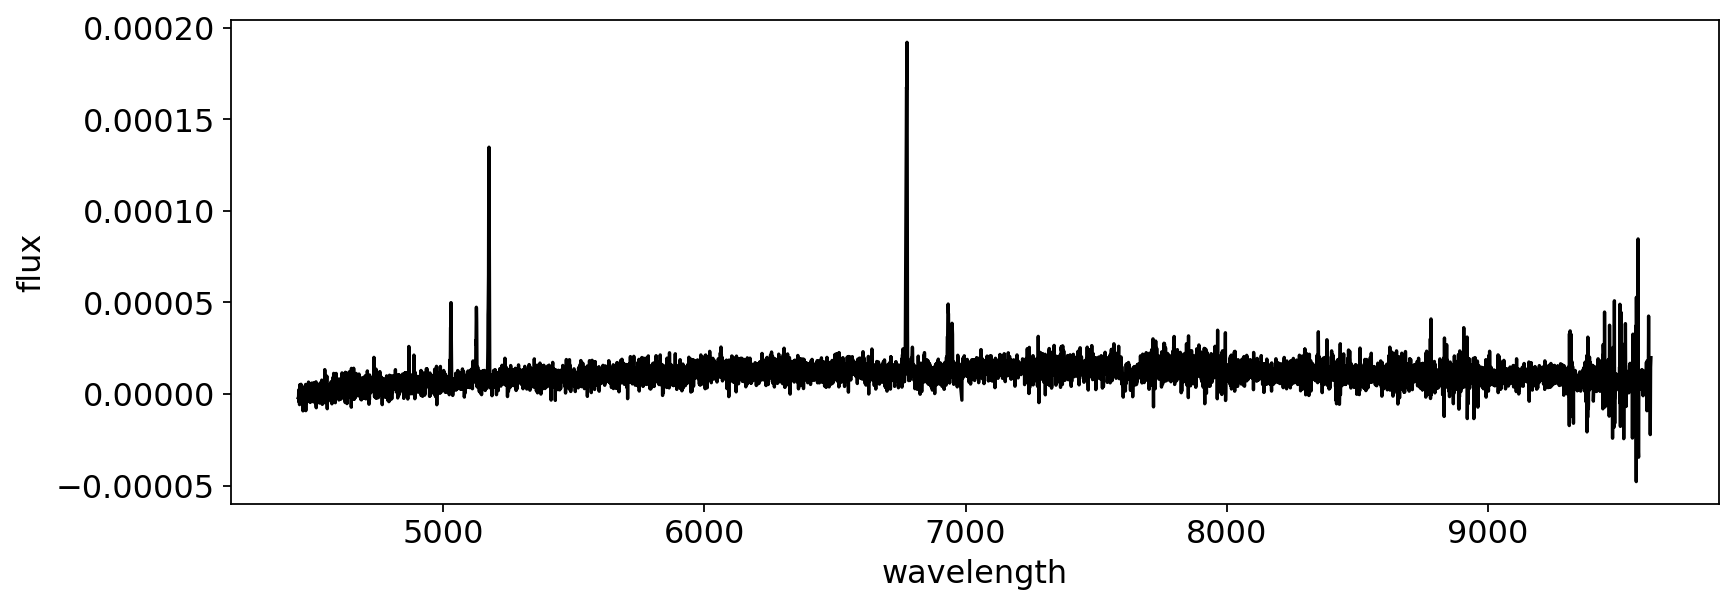

In [189]:
fm = f*10e-8
plt.figure(figsize=(12,4))
plt.plot(w, fm, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
#plt.ylim(-0.05,0.1)

(4800, 5300)

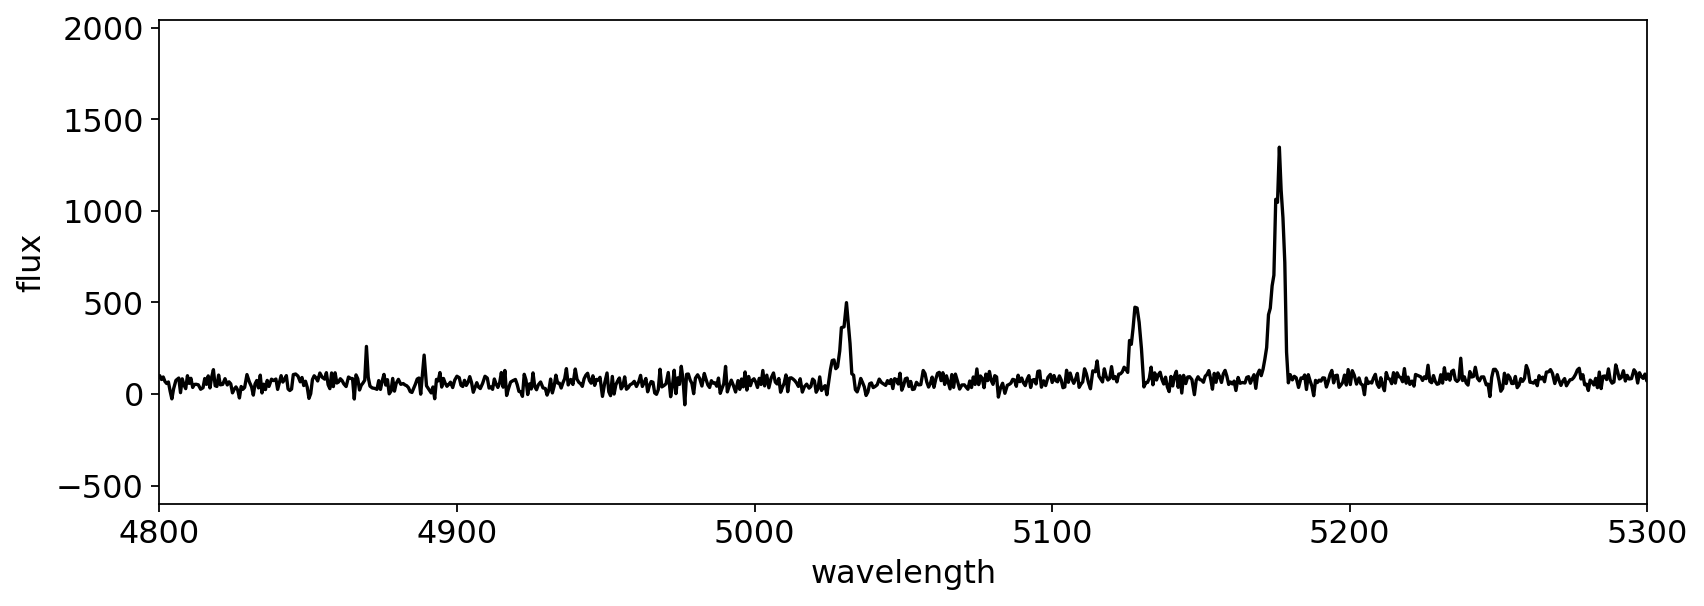

In [190]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(4800, 5300)

(6700, 7200)

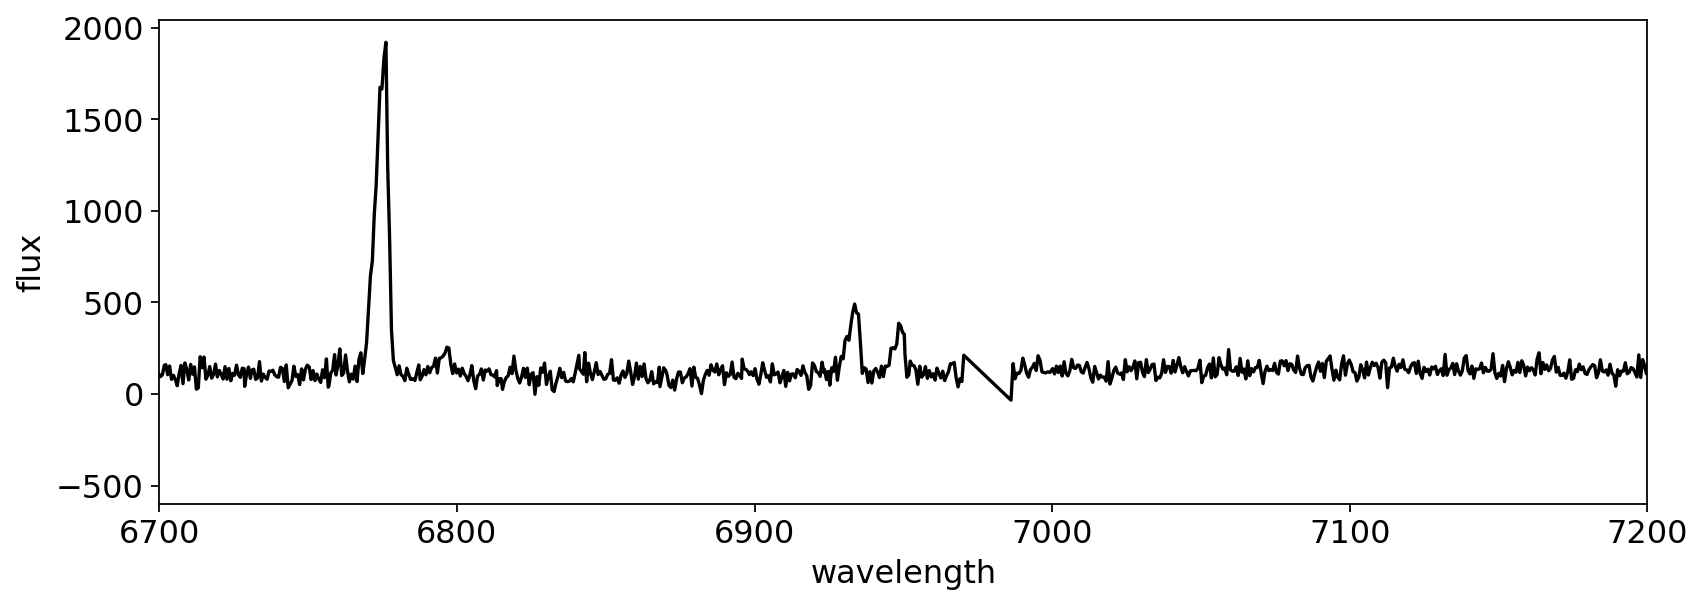

In [192]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6700, 7200)

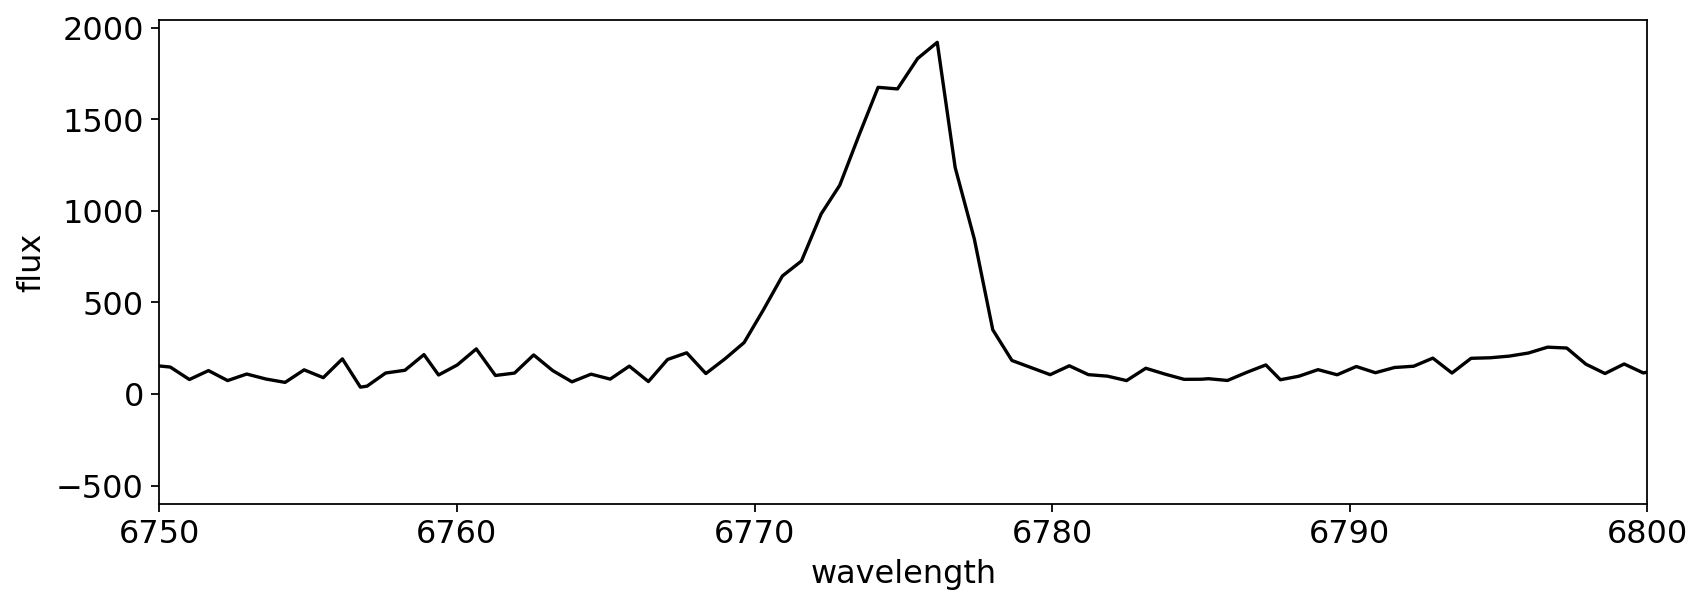

In [199]:
plt.figure(figsize=(12,4))
plt.plot(w, f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6750, 6800)
plt.axvline()

In [200]:
halpha = 6565.0 #not correct
hapeak = 6776.0
z = (hapeak/halpha)-1

In [219]:
print(z)

0.03214013709063224


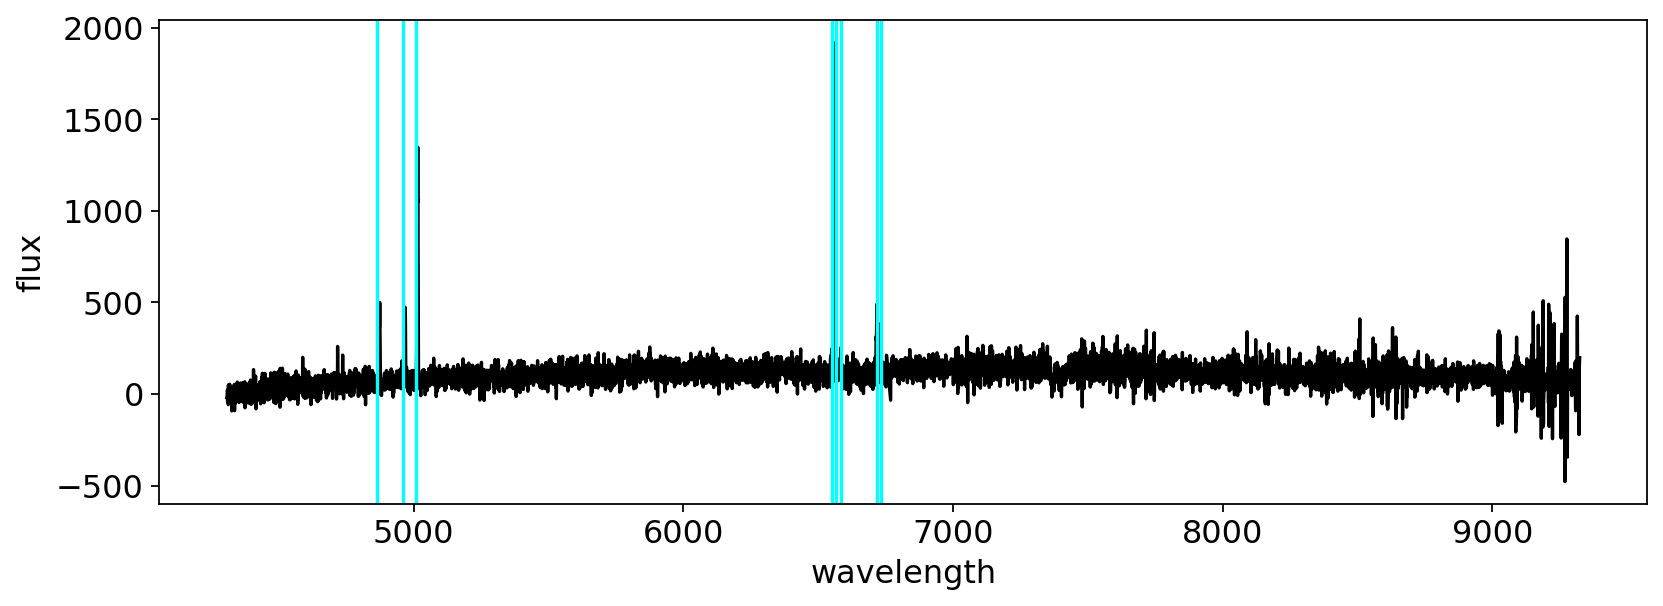

In [201]:
plt.figure(figsize=(12,4))
plt.plot(w/(1+z), f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
#plt.xlim(6750, 6800)
#hapeak = 6776.0
#z = (hapeak/halpha)-1
lines = [4863,4960,5008,6550,6565,6585,6718,6733]
for line in lines:
    plt.axvline(line, color='cyan')

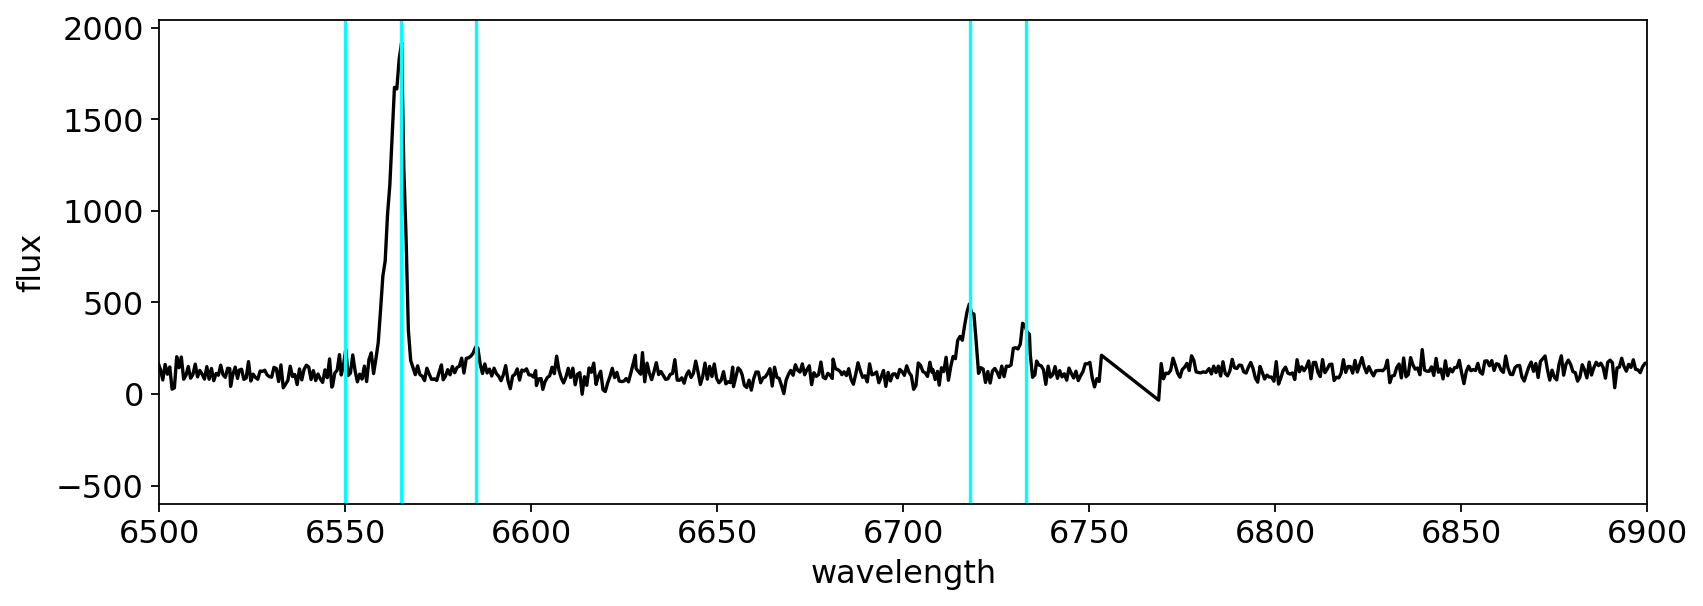

In [203]:
plt.figure(figsize=(12,4))
plt.plot(w/(1+z), f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(6500, 6900)
lines = [4863,4960,5008,6550,6565,6585,6718,6733]
for line in lines:
    plt.axvline(line, color='cyan')

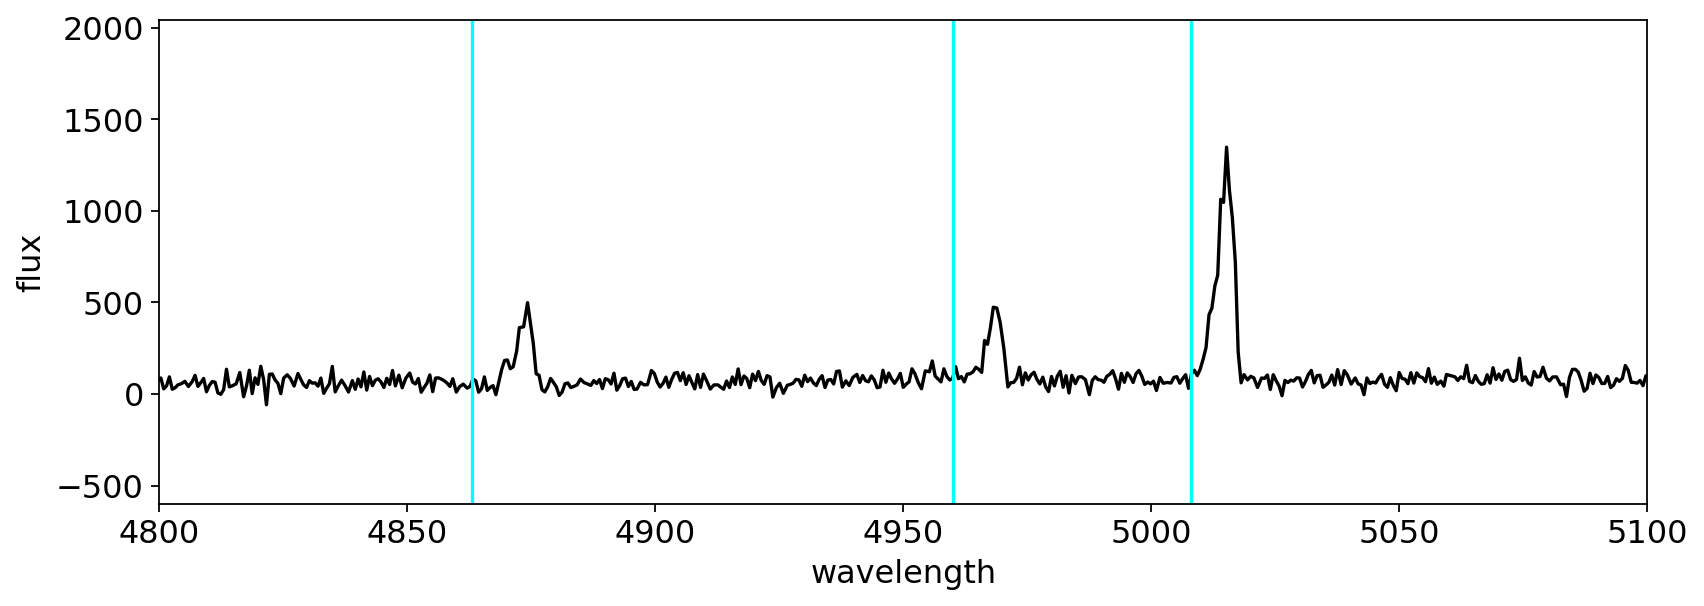

In [205]:
plt.figure(figsize=(12,4))
plt.plot(w/(1+z), f, color='k')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.xlim(4800, 5100)
lines = [4863,4960,5008,6550,6565,6585,6718,6733]
for line in lines:
    plt.axvline(line, color='cyan')

In [206]:
def build_obs(**extras):
    """Build a dictionary of observational data.  In this example 
    the data consist of photometry for a single nearby dwarf galaxy 
    from Johnson et al. 2013.
    
    :param snr:
        The S/N to assign to the photometry, since none are reported 
        in Johnson et al. 2013
        
    :param ldist:
        The luminosity distance to assume for translating absolute magnitudes 
        into apparent magnitudes.
        
    :returns obs:
        A dictionary of observational data to use in the fit.
    """
    from prospect.utils.obsutils import fix_obs
    import sedpy

    # The obs dictionary, empty for now
    obs = {}
    obs["filters"] = None
    obs["maggies"] = None
    obs["maggies_unc"] = None
    obs["phot_mask"] = None
    obs["phot_wave"] = None

    # We do not have a spectrum, so we set some required elements of the obs dictionary to None.
    # (this would be a vector of vacuum wavelengths in angstroms)
    obs["wavelength"] = data['wave']
    # (this would be the spectrum in units of maggies)
    obs["spectrum"] = data['flux']*10e-8
    # (spectral uncertainties are given here)
    obs['unc'] = 1.0/np.sqrt(data['ivar'])
    # (again, to ignore a particular wavelength set the value of the 
    #  corresponding elemnt of the mask to *False*)
    obs['mask'] = [True if m==1 else False for m in data['mask']]

    # This function ensures all required keys are present in the obs dictionary,
    # adding default values if necessary
    obs = fix_obs(obs)

    return obs

In [207]:
run_params = {}
obs = build_obs(**run_params)

In [208]:
from prospect.models.templates import TemplateLibrary
#TemplateLibrary.show_contents()
TemplateLibrary.describe("agn")

Free Parameters: (name: prior) 
-----------
  

Fixed Parameters: (name: value [, depends_on]) 
-----------
  fagn: 0.0001 
  agn_tau: 5.0 
  add_agn_dust: True 


In [209]:
TemplateLibrary.describe("nebular")

Free Parameters: (name: prior) 
-----------
  

Fixed Parameters: (name: value [, depends_on]) 
-----------
  add_neb_emission: True 
  add_neb_continuum: True 
  nebemlineinspec: True 
  gas_logz: 0.0 <function stellar_logzsol at 0x1a60d37ea0>
  gas_logu: -2.0 


In [226]:
def build_model(object_redshift=None, ldist=10.0, fixed_metallicity=None, add_duste=False, 
                **extras):
    """Build a prospect.models.SedModel object
    
    :param object_redshift: (optional, default: None)
        If given, produce spectra and observed frame photometry appropriate 
        for this redshift. Otherwise, the redshift will be zero.
        
    :param ldist: (optional, default: 10)
        The luminosity distance (in Mpc) for the model.  Spectra and observed 
        frame (apparent) photometry will be appropriate for this luminosity distance.
        
    :param fixed_metallicity: (optional, default: None)
        If given, fix the model metallicity (:math:`log(Z/Z_sun)`) to the given value.
        
    :param add_duste: (optional, default: False)
        If `True`, add dust emission and associated (fixed) parameters to the model.
        
    :returns model:
        An instance of prospect.models.SedModel
    """
    from prospect.models.sedmodel import SedModel
    from prospect.models.templates import TemplateLibrary
    from prospect.models import priors

    # Get (a copy of) one of the prepackaged model set dictionaries.
    # This is, somewhat confusingly, a dictionary of dictionaries, keyed by parameter name
    model_params = TemplateLibrary["ssp"]
    model_params.update(TemplateLibrary["nebular"])
    #model_params.update(TemplateLibrary["agn"])
    #model_params.update(TemplateLibrary["burst_sfh"])
    
    
   # Now add the lumdist parameter by hand as another entry in the dictionary.
   # This will control the distance since we are setting the redshift to zero.  
   # In `build_obs` above we used a distance of 10Mpc to convert from absolute to apparent magnitudes, 
   # so we use that here too, since the `maggies` are appropriate for that distance.
    model_params["lumdist"] = {"N": 1, "isfree": False, "init": ldist, "units":"Mpc"} #N=1 for scalar
    
#     # Let's make some changes to initial values appropriate for our objects and data
#     model_params["zred"]["init"] = 0.0
#     model_params["dust2"]["init"] = 0.05
#     model_params["logzsol"]["init"] = -0.5
#     model_params["tage"]["init"] = 13.
#     model_params["mass"]["init"] = 1e8
    
#     # These are dwarf galaxies, so lets also adjust the metallicity prior,
#     # the tau parameter upward, and the mass prior downward
#     model_params["dust2"]["prior"] = priors.TopHat(mini=0.0, maxi=2.0)
#     model_params["tau"]["prior"] = priors.LogUniform(mini=1e-1, maxi=1e2)
#     model_params["mass"]["prior"] = priors.LogUniform(mini=1e6, maxi=1e10)

#     # If we are going to be using emcee, it is useful to provide a 
#     # minimum scale for the cloud of walkers (the default is 0.1)
#     model_params["mass"]["disp_floor"] = 1e6
#     model_params["tau"]["disp_floor"] = 1.0
#     model_params["tage"]["disp_floor"] = 1.0
    
    # Change the model parameter specifications based on some keyword arguments
    if fixed_metallicity is not None:
        # make it a fixed parameter
        model_params["logzsol"]["isfree"] = False
        #And use value supplied by fixed_metallicity keyword
        model_params["logzsol"]['init'] = fixed_metallicity 

    model_params["zred"]["isfree"] = True
    model_params["zred"]["init"] = object_redshift
    #if object_redshift is not None:
    if False:
        # make sure zred is fixed
        model_params["zred"]['isfree'] = False
        # And set the value to the object_redshift keyword
        model_params["zred"]['init'] = object_redshift

    if add_duste:
        # Add dust emission (with fixed dust SED parameters)
        # Since `model_params` is a dictionary of parameter specifications, 
        # and `TemplateLibrary` returns dictionaries of parameter specifications, 
        # we can just update `model_params` with the parameters described in the 
        # pre-packaged `dust_emission` parameter set.
        model_params.update(TemplateLibrary["dust_emission"])
        
    # Now instantiate the model object using this dictionary of parameter specifications
    model = SedModel(model_params)

    return model

In [227]:
run_params["object_redshift"] = 0.03
run_params["fixed_metallicity"] = None
run_params["add_duste"] = True

In [228]:
model = build_model(**run_params)
print(model)
print("\nInitial free parameter vector theta:\n  {}\n".format(model.theta))
print("Initial parameter dictionary:\n{}".format(model.params))

:::::::
<class 'prospect.models.sedmodel.SedModel'>

Free Parameters: (name: prior) 
-----------
  zred: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)
  mass: <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)
  logzsol: <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)
  dust2: <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)
  tage: <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)

Fixed Parameters: (name: value [, depends_on]) 
-----------
  sfh: [0] 
  imf_type: [2] 
  dust_type: [0] 
  add_neb_emission: [ True] 
  add_neb_continuum: [ True] 
  nebemlineinspec: [ True] 
  gas_logz: [0.] <function stellar_logzsol at 0x1a60d37ea0>
  gas_logu: [-2.] 
  lumdist: [10.] 
  add_dust_emission: [ True] 
  duste_umin: [1.] 
  duste_qpah: [4.] 
  duste_gamma: [0.001] 

Initial free parameter vector theta:
  [ 3.e-02  1.e+10 -5.e-01  6.e-01  1.e+00]

Initial parameter dictionary:
{'zred': array([0.03]), 'mass': array(

In [229]:
def build_sps(zcontinuous=1, **extras):
    """
    :param zcontinuous: 
        A vlue of 1 insures that we use interpolation between SSPs to 
        have a continuous metallicity parameter (`logzsol`)
        See python-FSPS documentation for details
    """
    from prospect.sources import CSPSpecBasis
    sps = CSPSpecBasis(zcontinuous=zcontinuous)
    return sps

run_params["zcontinuous"] = 1

In [230]:
sps = build_sps(**run_params)
#help(sps.get_spectrum)

In [231]:
# Generate the model SED at the initial value of theta
theta = model.theta.copy()
initial_spec, initial_phot, initial_mfrac = model.sed(theta, obs=obs, sps=sps)

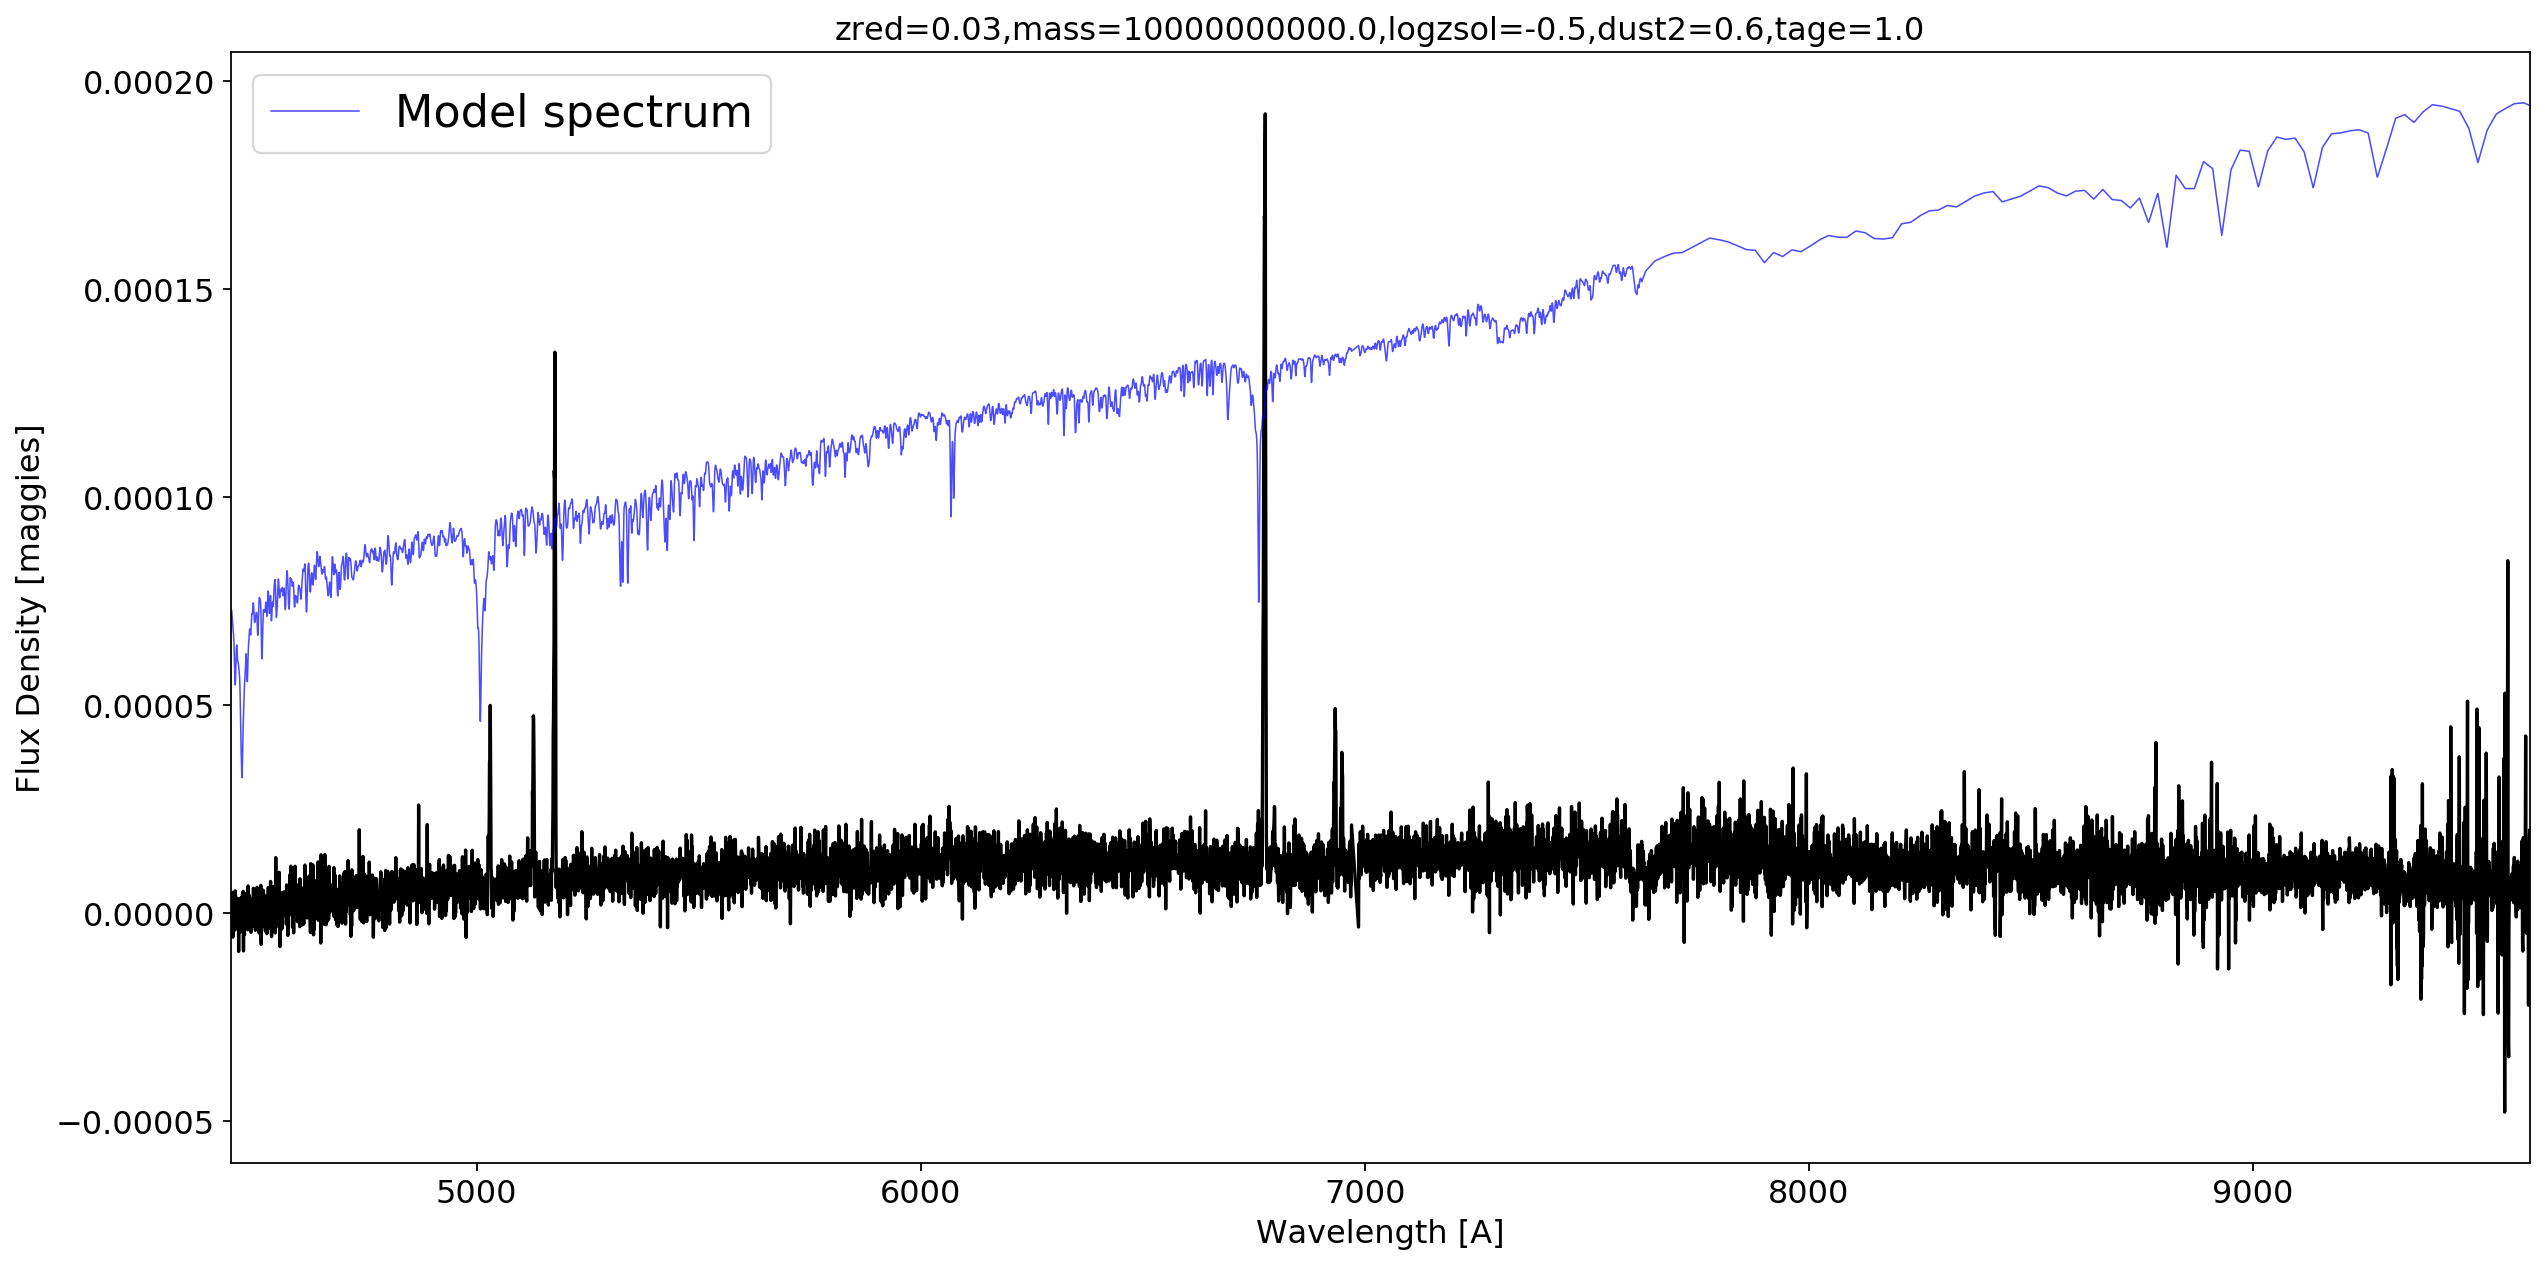

In [232]:
title_text = ','.join(["{}={}".format(p, model.params[p][0]) 
                       for p in model.free_params])
a = 1.0 + model.params.get('zred', 0.0) # cosmological redshifting
# photometric effective wavelengths
#wphot = obs["phot_wave"]
# spectroscopic wavelengths
if obs["wavelength"] is None:
    # *restframe* spectral wavelengths, since obs["wavelength"] is None
    wspec = sps.wavelengths
    wspec *= a #redshift them
else:
    wspec = obs["wavelength"]
    
# establish bounds
#xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
xmin, xmax = np.min(wspec), np.max(wspec)
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, initial_spec)
#ymin, ymax = temp.min()*0.8, temp.max()/0.4
plt.figure(figsize=(16,8))

# plot model + data
plt.plot(wspec, obs['spectrum'], color='black')
plt.plot(wspec, initial_spec, label='Model spectrum', 
       lw=0.7, color='blue', alpha=0.7)


plt.title(title_text)

# prettify
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux Density [maggies]')
plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])
plt.legend(loc='best', fontsize=20)
plt.tight_layout()

In [237]:
from prospect.likelihood import lnlike_spec, lnlike_phot, write_log

verbose = False
def lnprobfn(theta, model=None, obs=None, sps=None, 
             nested=False, verbose=verbose):
    """
    Given a parameter vector, a model, a dictionary of observational 
    data, and an sps object, return the ln of the posterior. 
    """

    # Calculate prior probability and exit if not within prior
    # Also if doing nested sampling, do not include the basic priors, 
    # since the drawing method includes the prior probability
    lnp_prior = model.prior_product(theta, nested=nested)
    if not np.isfinite(lnp_prior):
        return -np.infty
        
    # Generate "mean" model
    spec, phot, mfrac = model.mean_model(theta, obs, sps=sps)
 
    # Calculate likelihoods
    lnp_spec = lnlike_spec(spec, obs=obs)
    lnp_phot = lnlike_phot(phot, obs=obs)

    return lnp_prior + lnp_phot + lnp_spec

run_params["verbose"] = verbose

In [238]:
from prospect.likelihood import chi_spec, chi_phot
def chivecfn(theta):
    """A version of lnprobfn that returns the simple uncertainty 
    normalized residual instead of the log-posterior, for use with 
    least-squares optimization methods like Levenburg-Marquardt.
    
    It's important to note that the returned chi vector does not 
    include the prior probability.
    """
    lnp_prior = model.prior_product(theta)
    if not np.isfinite(lnp_prior):
        return np.zeros(model.ndim) - np.infty

    # Generate mean model
    try:
        spec, phot, x = model.mean_model(theta, obs, sps=sps)
    except(ValueError):
        return np.zeros(model.ndim) - np.infty

    chispec = chi_spec(spec, obs)
    chiphot = chi_phot(phot, obs)
    return np.concatenate([chispec, chiphot])

In [239]:
from prospect.fitting import lnprobfn

In [240]:
# Here we will run all our building functions
obs = build_obs(**run_params)
sps = build_sps(**run_params)
model = build_model(**run_params)

In [241]:
# For fsps based sources it is useful to 
# know which stellar isochrone and spectral library
# we are using
print(sps.ssp.libraries)

(b'mist', b'miles')


In [242]:
from prospect.fitting import fit_model

In [243]:
# --- start minimization ----
run_params["dynesty"] = False
run_params["emcee"] = False
run_params["optimize"] = True
run_params["min_method"] = 'lm'
# We'll start minimization from "nmin" separate places, 
# the first based on the current values of each parameter and the 
# rest drawn from the prior.  Starting from these extra draws 
# can guard against local minima, or problems caused by 
# starting at the edge of a prior (e.g. dust2=0.0)
run_params["nmin"] = 2

output = fit_model(obs, model, sps, lnprobfn=lnprobfn, **run_params)

print("Done optmization in {}s".format(output["optimization"][1]))

Done optmization in 197.88215804100037s


In [244]:
print(model.theta)
(results, topt) = output["optimization"]
# Find which of the minimizations gave the best result, 
# and use the parameter vector for that minimization
ind_best = np.argmin([r.cost for r in results])
print(ind_best)
theta_best = results[ind_best].x.copy()
print(theta_best)

# generate model
prediction = model.mean_model(theta_best, obs=obs, sps=sps)
pspec, pphot, pfrac = prediction

[ 3.60162714e+00  1.40391508e+08 -1.35032686e+00  1.12768913e-07
  2.19363351e-01]
1
[ 3.60162714e+00  1.40391508e+08 -1.35032686e+00  1.12768913e-07
  2.19363351e-01]


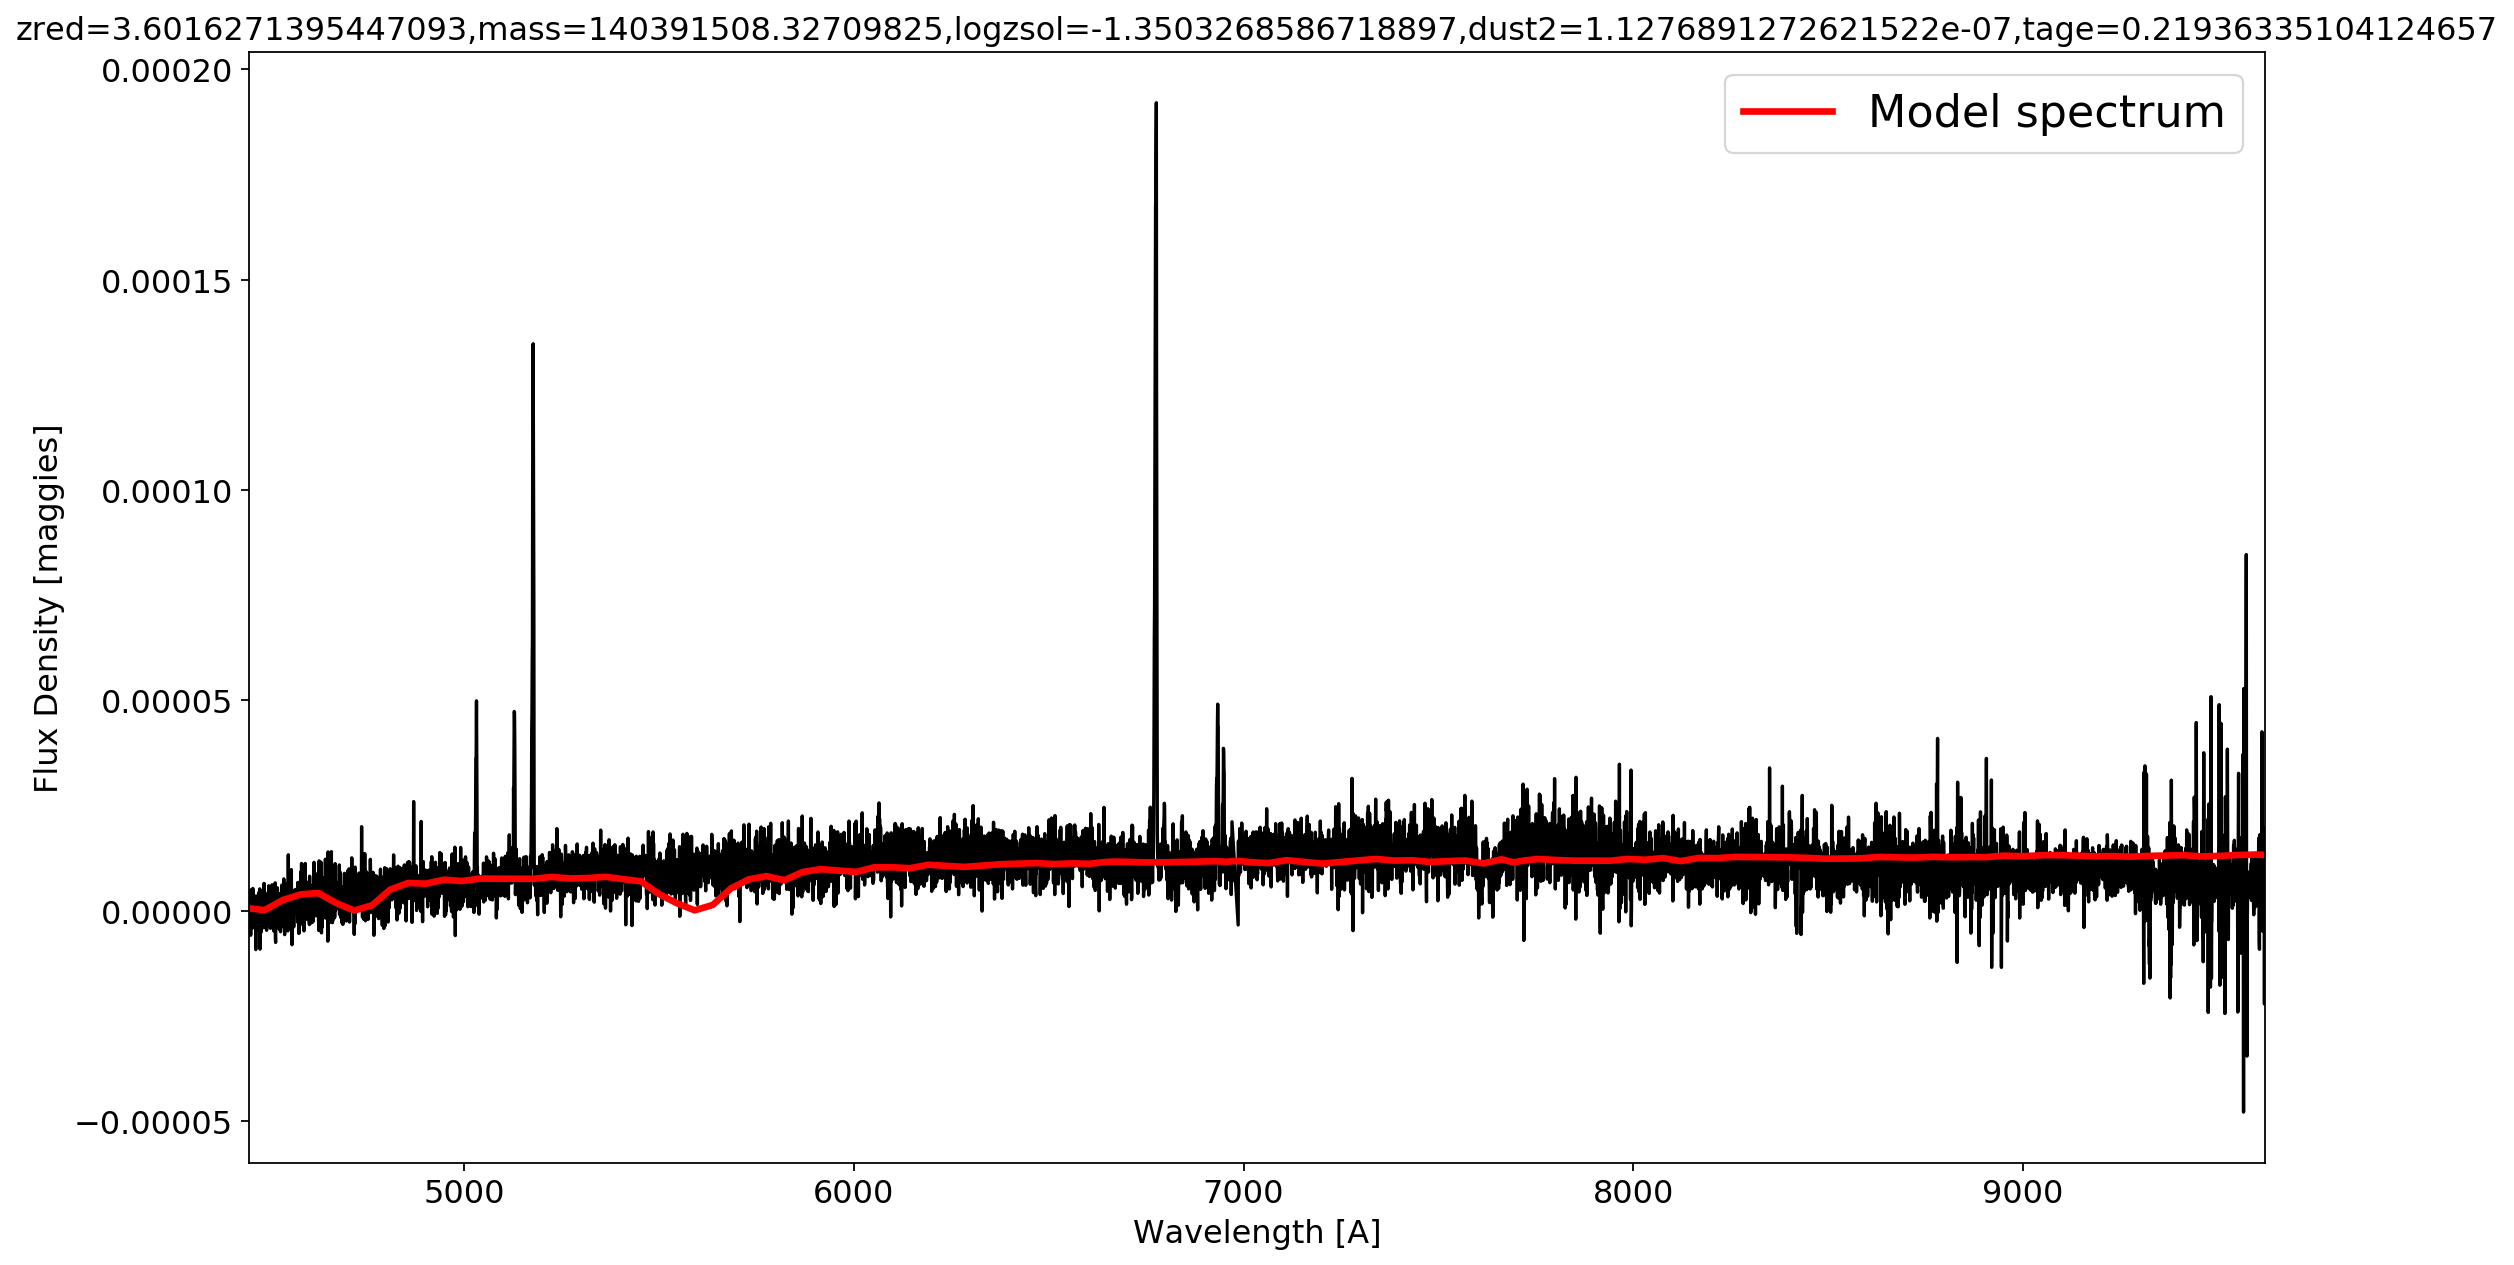

In [245]:
title_text = ','.join(["{}={}".format(p, model.params[p][0]) 
                       for p in model.free_params])
a = 1.0 + model.params.get('zred', 0.0) # cosmological redshifting
# photometric effective wavelengths
#wphot = obs["phot_wave"]
# spectroscopic wavelengths
if obs["wavelength"] is None:
    # *restframe* spectral wavelengths, since obs["wavelength"] is None
    wspec = sps.wavelengths
    wspec *= a #redshift them
else:
    wspec = obs["wavelength"]
    
# establish bounds
#xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
xmin, xmax = np.min(wspec), np.max(wspec)
temp = np.interp(np.linspace(xmin,xmax,10000), wspec, initial_spec)
#ymin, ymax = temp.min()*0.8, temp.max()/0.4
plt.figure(figsize=(16,8))

# plot model + data
plt.plot(wspec, obs['spectrum'], color='black')
plt.plot(wspec, pspec, label='Model spectrum', 
       lw=3, color='red', alpha=1)


plt.title(title_text)

# prettify
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux Density [maggies]')
plt.xlim([xmin, xmax])
#plt.ylim([ymin, ymax])
plt.legend(loc='best', fontsize=20)
plt.tight_layout()